In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [28]:
respondentData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusresp_2015.csv")
rosterData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusrost_2015.csv")
whoData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atuswho_2015.csv")
activityData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusact_2015.csv")
elderCareData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusrostec_2015.csv")
cpsData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atuscps_2015.csv")

In [29]:
activityDataLabels = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/activityDataLabels.csv")

In [30]:
activityDecoder = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/ActivityCodes.csv",quotechar='"')
incomeDecoder = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/IncomeCodes.csv",quotechar='"')
#print activityDecoder
activityDecoderGrouped = activityDecoder.groupby(['TUTIER1CODE'])
print len(activityDecoderGrouped)
#print activityDecoderGrouped[activityDecoderGrouped['major code']==1]
print len(activityDecoder[activityDecoder['TUTIER1CODE']==1])
print activityDecoder[activityDecoder['TUTIER1CODE']==1]
#for codeName,decoder in activityDecoderGrouped:
#    print "****** "+str(codeName)
#    print decoder['second label']

actData = activityData.merge(activityDecoder, on=['TUTIER1CODE','TUTIER2CODE'])
#actData.head()

18
6
   TUTIER1CODE    tier1 label  TUTIER2CODE                tier2 label
0            1  Personal Care            1                   Sleeping
1            1  Personal Care            2         Grooming, dressing
2            1  Personal Care            3    Health-related selfcare
3            1  Personal Care            4        Personal Activities
4            1  Personal Care            5  Personal Care Emergencies
5            1  Personal Care           99       Personal Care n.e.c.


In [31]:
#feed in times from activityData data frame
#output minutes lapsed
def duration(stopTime,startTim):
    t2 = pd.Timedelta(stopTime)
    t1 = pd.Timedelta(startTim)
    dur = t2 - t1
    if dur < pd.Timedelta('0 days'):
        dur = dur + pd.Timedelta('1 days')
    return dur/pd.Timedelta(minutes=1)

def durationSeries(row):
    t2 = pd.Timedelta(row['TUSTOPTIME'])
    t1 = pd.Timedelta(row['TUSTARTTIM'])
    dur = t2 - t1
    if dur < pd.Timedelta('0 days'):
        dur = dur + pd.Timedelta('1 days')
    return dur/pd.Timedelta(minutes=1)
    

In [32]:
activityDataAbrrv = activityData[['TUCASEID','TUACTIVITY_N','TUACTDUR24','TUSTARTTIM','TUSTOPTIME','TUTIER1CODE','TUTIER2CODE','TUTIER3CODE']]

In [33]:
activityDataByRespondent = activityDataAbrrv.groupby('TUCASEID')

In [34]:
#construct dataframe of each person's time
timelabels=[]
for ActName1,actGroup1 in activityDecoderGrouped:
    lablOfG1 = actGroup1['tier1 label'].iloc[0]
    timelabels.append(lablOfG1)

#print timelabels
#timeSpentDFtemp = pd.DataFrame.from_records([init1],columns=timelabels)
#timeSpentDF = timeSpentDF.append(timeSpentDFtemp,ignore_index=True)
#print timeSpentDF

found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
****


[]

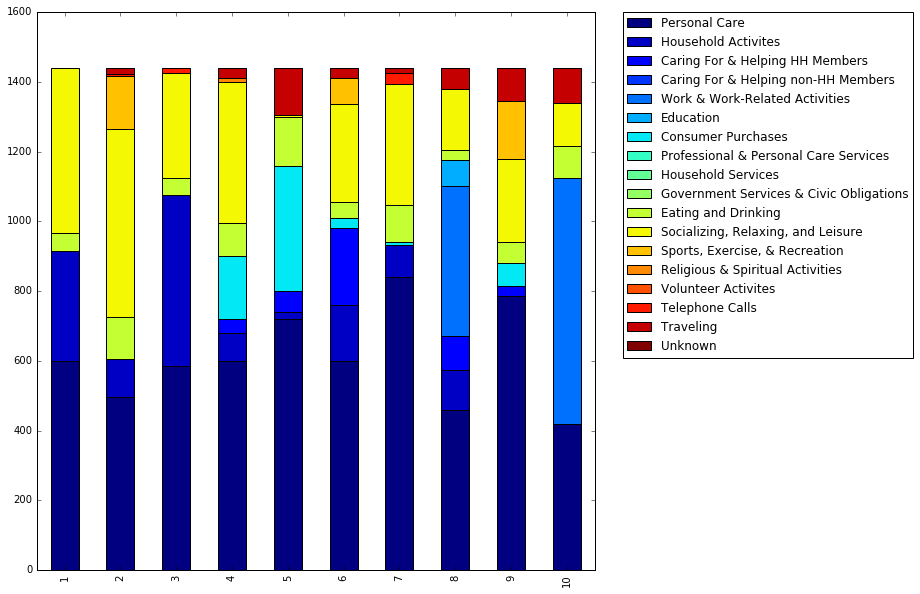

In [36]:
init = [0]*len(timelabels)
timeSpentDF = pd.DataFrame.from_records([init],columns=timelabels)
key_for_TimeSpentDF = []
numPeople=0
for respondentName,respAct in activityDataByRespondent:
    #if 20150101150018==respondentName:
    numPeople=numPeople+1
    if numPeople<=10:
    
        print "found respondant!"
        timeSpent=[0]*len(timelabels)
        i=0
        for ActName1,actGroup1 in activityDecoderGrouped:
            actsOfG1 = respAct[respAct['TUTIER1CODE']==ActName1]
            timeOfG1 = actsOfG1['TUACTDUR24'].sum()
            #print timeOfG1
            timeSpent[i] = timeOfG1
            i=i+1
        #print timeSpent
        thisPersonDF = pd.DataFrame.from_records([timeSpent],columns=timelabels)
        key_for_TimeSpentDF.append(respondentName)
        #print thisPersonDF
        timeSpentDF = timeSpentDF.append(thisPersonDF,ignore_index=True)

#drop placeholder data
#print timeSpentDF
print "****"
timeSpentDF = timeSpentDF.drop(timeSpentDF.index[[0]])
#print timeSpentDF    
        
        
        
        
    
        #plt.bar(,timeSpentDF['time'])
        #test5 = timeSpentDF.groupby(['Site Name', 'Abuse/NFF'])['Site Name'].count().unstack('Abuse/NFF').fillna(0)

            #test5.plot(kind='bar', stacked=True)
ax = timeSpentDF.plot(kind='bar',stacked=True,figsize=(10,10), colormap='jet')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.plot()           
            
    